# Homework 1: Data-driven decison making

Read the case study *Select Collections, Inc.* included with this assignment. You will play a role similar to that of the summer intern, Marcos Kilduff. However, your assignment is not to predict `totalpay` for the observations in the test set. Instead, your task is to **decide** which of the accounts in the test set should be purchased and to **evaluate** the profits that your purchasing decisions could generate. Purchasing any individual account costs 25% of the account's balance (`cobal`).

## Instructions and Grade Breakdown

You must submit your assignment individually, and you will be graded individually, but you are expected to work on the assignment with one or two other classmates. Your role in the group is to help your classmates submit a better assignment. This is not the same as doing the assignment for them, and you should report if there are any free riders in your group. Your classmates should also help you do a better assignment or in less time than what you could have done on your own. I encourage everyone in the group to submit the same assignment, but it is OK if you submit a different assignment than other group members.

The grade breakdown for this assignment is as follows:
1. **Decision-making (50\%):** You will be evaluated primarily based on how profitable your solution is, and secondly based on how well you did compared to other groups. So, the more profits you generate, the better. Your decisions must be uploaded in a file called "decisions_NICKNAME.csv" (replace NICKNAME with your nickname; people in the same group can have the same nickname). The first column must have the header "acctid" and contain the ID of all the accounts in the test set. The second column must have the header "decision" and contain the purchase decisions for all the accounts in the test set: use a 1 for accounts you decide to purchase and a 0 for accounts you decide not to purchase. For an example of how to output a file with these characteristics, see the code below. **IMPORTANT**: You will receive no credits if the file you upload does not follow these guidelines, so please be careful.
2. **Evaluation (30\%):** You must also report an estimate of how much profits do you expect to make with your decisions. You will be evaluated primarily based on how well you estimate the profits you actually make, and secondly based on your performance compared to other groups. Your estimate must be uploaded as a non-formatted integer number in a file called "estimate_NICKNAME.txt" (replace NICKNAME with your nickname; people in the same group can have the same nickname). For an example of how to output a file with these characteristics, see the code below. **IMPORTANT**: You will receive no credits if the file you upload does not follow these guidelines, so please be careful.
3. **Teamwork (20\%):** You and your group members must evaluate each other by completing the peer evaluation in this link: https://canvas.ust.hk/courses/46343/quizzes/87071. **IMPORTANT**: You will receive no credits if you do not complete your peer evaluation as part of your submission, so please be careful. One of the questions in the evaluation is this one: `Did this group member helped you submit a better assignment or in less time than what you could have done on your own?` Your grade will depend on the answer of other group members, and their grade will depend on your answer. These are the possible answers:
   * Great: "Definitely. My assignment is much better or it took me much less time than if I had done it without them." (+10% to grade, or +20% if you are in a group of 2)
   * Acceptable: "To some extent. My assignment is slightly better or it took me slightly less time than if I had done it without them." (+5% to grade, or +10% if you are in a group of 2)
   * Worrisome: "Not really. They did not save me time or help me submit a better assignment, but they gave it an honest try." (+2% to grade, or +4% if you are in a group of 2, and the person who answered this should reach out to the corresponding group member)
   * Unacceptable: "No. And they offered me very little help or no help at all." (+0%, the person who answered this should reach out to the corresponding group member, and the professor will look into it)


4. **Code (required):** You must also submit your code and ensure your results can be reproduced. We won't evaluate your code, but you will receive no credits if we can't reproduce your results or if we suspect plagiarism (you must work on this assignment only with people in your group).

Tips:
* Don't try to build the best possible model from the start. Just try to build something that is profitable and works better than just buying all the accounts. Then, keep improving your model if you have extra time. 
* Remember to use labeled data for the evaluation.
* The following tip is optional and intended for people who want to go the extra mile with evaluation. The variance of the target variable in this data set is large, so it's possible to obtain a not-so-great evaluation estimate due to a relatively bad train/test split. To address this issue, you may want to average your evaluation results across multiple train/test splits. See the `for` loop in the code at the end of this post for an example: https://thinkingneuron.com/how-to-test-machine-learning-models-using-bootstrapping/. Alternatively, you could use nested cross-validation. You can find an example here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html.

A couple of other things:
* I will use your nickname to report your group's performance to the entire class. So, do not share your nickname with others (unless you don't care about everyone else knowing how well you or your group did).  
* The coding component of the final exam will be similar to this assignment. So, take this as an opportunity to practice.

In [87]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings("ignore")

#数据处理包导入
import numpy as np
import pandas as pd

#画图包导入
import matplotlib.pyplot as plt
plt.style.use(style="ggplot")
import missingno as msno
import seaborn as sns
sns.set()

ModuleNotFoundError: No module named 'missingno'

In [ ]:
# Here's a brief example of how to export the files for items 1 and 2
import pandas as pd

df_train = pd.read_csv("SC Training Data.csv")
df_test = pd.read_csv("SC Test Data.csv")
your_nickname = "XXXXXXX"

##### EXAMPLE OF HOW TO CREATE FILE FOR DECISIONS
# Purchase the account if numcalls is below the mean
decisions = df_test.numcalls < df_test.numcalls.mean()
# Convert the decisions to 1s and 0s
decisions = decisions.astype(int)
# Create data frame with the decisions and export to CSV file
df_decisions = pd.DataFrame({"acctid":df_test["acctid"], "decision": decisions})
df_decisions.to_csv(f"decisions_{your_nickname}.csv", index=False)


##### EXAMPLE OF HOW TO CREATE FILE FOR EVALUATION
# Estimate is the average profits in the training set times the number of accounts in the test set
acc_cost = 800
estimate = (df_train.totalpay.mean() - acc_cost) * df_test.shape[0]
# Transform estimate into integer
estimate = int(estimate)
# Export results to a text file
with open(f"estimate_{your_nickname}.txt", "w") as text_file:
    text_file.write(f"{estimate:.0f}")

## 数据预处理

In [ ]:
df_train

In [ ]:
df_train.info()

In [ ]:
#查看缺失值
df_train.isnull().sum()

In [ ]:
df_train.describe()

In [ ]:
## 数字类型变量 和 分类变量
number_features = [ 'acctid','cobal', 'cs']+"accessscr lnacscr bureauscr eaglemod numcalls numrpcs totalpay".split(' ')
categorical_features = ['state','zip' ,'rollout','collscr']
number_features

In [ ]:
## 转换分类变量
from sklearn.preprocessing import LabelEncoder


# 将每一个含有类别变量的列都转化为含有整数值的列
label_encoder = LabelEncoder()
for col in categorical_features:
    df_train[col] = label_encoder.fit_transform(df_train[col])
df_train
df_train.describe()

## 特征选择

In [ ]:
## 检测数值特征和目标变量之间的相关性
corrMat =df_train[number_features].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(20,10))
plt.xticks(rotation=60)#设置刻度标签角度
sns.heatmap(corrMat, mask=mask,vmax=.8, square=True,annot=True)

corrMat

In [88]:
corrMat["totalpay"].sort_values(ascending=False)

totalpay     1.000000
cobal        0.292946
bureauscr    0.009544
eaglemod     0.000990
accessscr   -0.004149
lnacscr     -0.011206
acctid      -0.015790
cs          -0.040565
numcalls    -0.043031
numrpcs     -0.055108
Name: totalpay, dtype: float64

<AxesSubplot:>

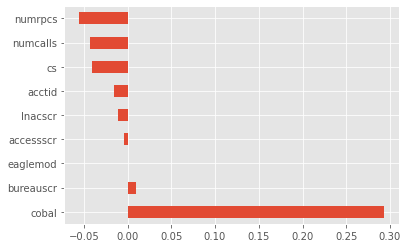

In [89]:
corrMat["totalpay"].drop("totalpay").sort_values(ascending=False).plot.barh()

<AxesSubplot:title={'center':'totalpay'}, xlabel='rollout'>

,df,sum_sq,mean_sq,F,PR(>F)
rollout,7.0,3.825964e+07,5.465662e+06,5.331253,0.000004
Residual,3562.0,3.651804e+09,1.025212e+06,NaN,NaN


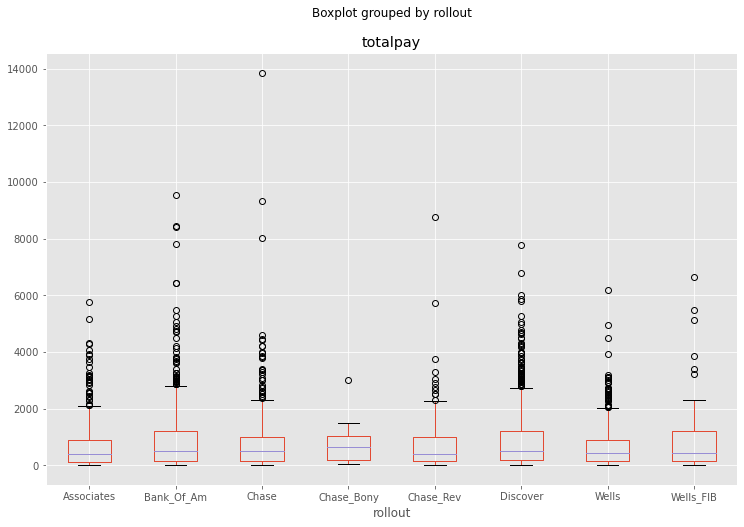

In [90]:
##分类变量与totalpay的相关性分析
#rollout
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import ttest_1samp

df_train = pd.read_csv("SC Training Data.csv")
df_train.boxplot('totalpay', by='rollout', figsize=(12, 8))
#sns.boxplot(x='Products',y='Worker',data=df4)
plt.savefig('totalpay-rollout')

model=ols('totalpay ~rollout', data=df_train).fit()
anova_table = anova_lm(model, type=2)
pd.DataFrame(anova_table)

<AxesSubplot:title={'center':'totalpay'}, xlabel='state'>

,df,sum_sq,mean_sq,F,PR(>F)
state,50.0,1.299687e+08,2.599373e+06,2.569368,1.233844e-08
Residual,3519.0,3.560095e+09,1.011678e+06,NaN,NaN


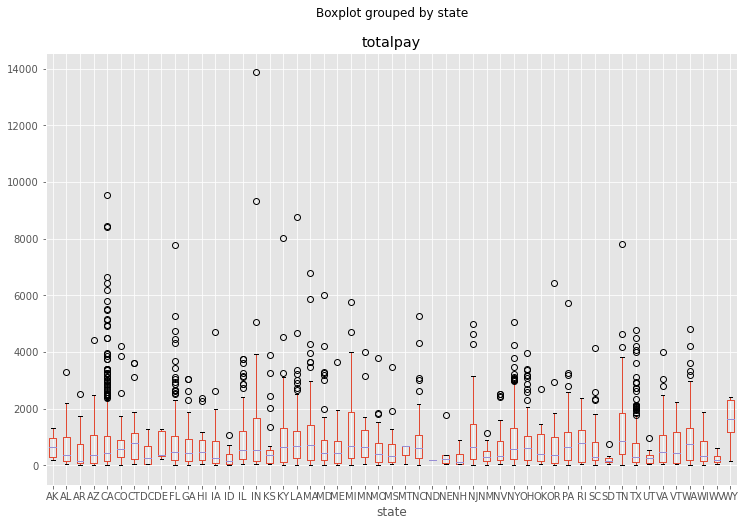

In [91]:
#state
df_train.boxplot('totalpay', by='state', figsize=(12, 8))
#sns.boxplot(x='state',y='state',data=df4)
plt.savefig('totalpay-state')

model=ols('totalpay ~state', data=df_train).fit()
anova_table = anova_lm(model, type=2)
pd.DataFrame(anova_table)

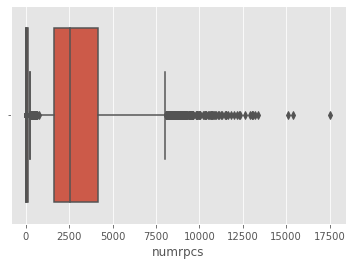

In [92]:
import seaborn as sns
sns.boxplot(x=df_train['cobal']);
sns.boxplot(x=df_train['cs']);
sns.boxplot(x=df_train['numcalls']);
sns.boxplot(x=df_train['numrpcs']);

In [93]:
###Outliers handling
##Using 4-Quantile to locate outliers
df_d_col1="cobal"
##df_d_col2="cs"
df_d_col3="numcalls"
df_d_col4="numrpcs"
df_pl=1.5

df_Q1_all=df_train.quantile(0.25)
df_Q3_all=df_train.quantile(0.75)
df_Q1_d1=df_Q1_all[df_d_col1]
df_Q3_d1=df_Q3_all[df_d_col1]
##df_Q1_d2=df_Q1_all[df_d_col2]
##df_Q3_d2=df_Q3_all[df_d_col2]
df_Q1_d3=df_Q1_all[df_d_col3]
df_Q3_d3=df_Q3_all[df_d_col3]
df_Q1_d4=df_Q1_all[df_d_col4]
df_Q3_d4=df_Q3_all[df_d_col4]

df_IQR_all=df_Q3_all-df_Q1_all
df_IQR_d1=df_IQR_all[df_d_col1]
##df_IQR_d2=df_IQR_all[df_d_col2]
df_IQR_d3=df_IQR_all[df_d_col3]
df_IQR_d4=df_IQR_all[df_d_col4]

outliers_1=df_train[(df_train[df_d_col1]<(df_Q1_d1-df_pl*df_IQR_d1))|(df_train[df_d_col1]>(df_Q3_d1+df_pl*df_IQR_d1))].index.tolist()
#outliers_2=df_train[(df_train[df_d_col2]<(df_Q1_d2-df_pl*df_IQR_d2))|(df_train[df_d_col2]>(df_Q3_d2+df_pl*df_IQR_d2))].index.tolist()
outliers_3=df_train[(df_train[df_d_col3]<(df_Q1_d3-df_pl*df_IQR_d3))|(df_train[df_d_col3]>(df_Q3_d3+df_pl*df_IQR_d3))].index.tolist()
outliers_4=df_train[(df_train[df_d_col4]<(df_Q1_d4-df_pl*df_IQR_d4))|(df_train[df_d_col4]>(df_Q3_d4+df_pl*df_IQR_d4))].index.tolist()
outliers=outliers_1+outliers_3+outliers_4
##Delete outliers and re-define dataframe
df_train.drop(index=outliers, inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_train

,acctid,state,zip,rollout,cobal,collscr,cs,accessscr,lnacscr,bureauscr,eaglemod,numcalls,numrpcs,totalpay
0,1,CA,93313,Wells,1786,4013181,4,0.1992,-1.61,133,67,104,3,360
1,3,FL,33319,Wells,5170,4013057,4,0.8140,-0.21,103,90,28,1,10
2,4,WA,98115,Bank_Of_Am,4506,8012265,8,0.2978,-1.21,136,11,8,2,2550
3,6,MD,20743,Associates,740,5012860,5,0.4153,-0.88,120,51,9,1,14
4,7,TN,37917,Discover,1578,3013468,3,0.8264,-0.19,126,67,82,1,368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,3564,KS,66762,Associates,2213,7012524,7,0.0072,-4.93,130,52,87,2,60
2970,3565,SC,29692,Chase,2582,8000000,8,0.6965,-0.36,109,31,36,1,1595
2971,3566,OH,44657,Chase,2301,3013349,3,0.6237,-0.47,110,85,41,4,1600
2972,3567,CA,90005,Associates,1763,2014341,2,0.3298,-1.11,125,19,6,2,50


## 构建模型

In [95]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.base import clone
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
##from xgboost import XGBRegressor

feature_names = ['state', 'rollout', 'cobal', 'cs', 'numcalls','numrpcs']
categorical_features = ['state', 'rollout']
Xtrain = pd.get_dummies(df_train[feature_names], columns=categorical_features, drop_first=True)
Ytrain = df_train["totalpay"]
X_train, X_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=42)

def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return rmse

models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),DecisionTreeRegressor()]
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Tree"]
cv_results = []
for name, model in zip(names, models):
    score = rmse_cv(model, X_train, y_train)
    cv_results.append(score)
    print('%s: %f (%f)' % (name, score.mean(), score.std()))

def grid(model, X, y, params):
    grid_search = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X, y)
    print(grid_search.best_params_, np.sqrt(-grid_search.best_score_))

params_lasso = {'alpha': [0.0004,0.0005,0.0007,0.0009], 'max_iter':[10000]}
grid(Lasso(), X_train, y_train, params_lasso)

params_ridge = {'alpha':[35,40,45,50,55,60,65,70,80,90]}
grid(Ridge(), X_train, y_train, params_ridge)

params_svr = {'C':[11,13,15],'kernel':["rbf"],"gamma":[0.0003,0.0004],"epsilon":[0.008,0.009]}
grid(SVR(), X_train, y_train, params_svr)

params_ker = {'alpha':[0.2,0.3,0.4], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1]}
grid(KernelRidge(), X_train, y_train, params_ker)

params_ela = {'alpha':[0.0008,0.004,0.005],'l1_ratio':[0.08,0.1,0.3],'max_iter':[10000]}
grid(ElasticNet(), X_train, y_train, params_ela)

params_tree= {"min_samples_leaf": range(1, 66), "criterion":['mse', 'mae', 'friedman_mse']}
grid(DecisionTreeRegressor(), X_train, y_train, params_tree)

lasso = Lasso(alpha=0.0009, max_iter=10000)
ridge = Ridge(alpha=65)
svr = SVR(C=15, epsilon=0.009, gamma= 0.0004, kernel='rbf')
ker = KernelRidge(alpha=0.4, coef0=1, degree=3, kernel='polynomial')
ela = ElasticNet(alpha=0.005,l1_ratio=0.1,max_iter=10000)
bay = BayesianRidge()

LR: 909.218891 (102.376630)
Ridge: 907.397480 (102.917331)
Lasso: 909.079129 (102.369200)
RF: 935.885899 (100.516245)
GBR: 903.685649 (88.565541)
SVR: 989.569327 (130.533477)
LinSVR: 1751.838310 (823.391157)
Ela: 907.455705 (102.901175)
SGD: 3451034223898030.000000 (3137095727108898.500000)
Bay: 908.318703 (102.348303)
Ker: 921.186791 (95.728200)
Extra: 971.606615 (95.417579)
Tree: 1275.163330 (109.866803)
{'alpha': 0.0009, 'max_iter': 10000} 914.9495125945207
{'alpha': 55} 906.886617256251
{'C': 15, 'epsilon': 0.009, 'gamma': 0.0003, 'kernel': 'rbf'} 1000.5869692799998
{'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} 1032.8304357684708
{'alpha': 0.005, 'l1_ratio': 0.08, 'max_iter': 10000} 909.2872259676512
{'criterion': 'mse', 'min_samples_leaf': 55} 919.8447808027903
